Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##### <font color = 'red'> OBS: Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções de Deep Learning extraem essas características, pois entendem quais características são essas.</font>

Explorando os dados

In [3]:
len(imagens_treino)
imagens_treino.shape # O primeiro número indica que temos 60 000 imagens, o segundo que são compostas de 28 linhas e o terceiro que elas são compostas de 28 colunas.
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

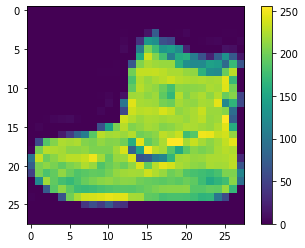

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
# Que cores tem nossa imagem?
plt.imshow(imagens_treino[0])
plt.colorbar()

Exebição dos dados

## NORMALIZANDO AS IMAGENS

In [5]:
# A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.

# Dividindo a cor em um intervalo de 0 a 1: (ajuda a diminuir a perda)
imagens_treino = imagens_treino/float(255) # Normalização.

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), # Podemos observar a nossa camada de entrada, ou camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    # Camada de entrada:
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento:  A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. (camada 1)  
    # Camadas ocultas: 
    # OBS: Como o modelo tem mais camadas para extrair características, ele tem um trabalho maior, o que gera um aumento no tempo que ele leva para treinar.
    keras.layers.Dense(128, activation=tensorflow.nn.relu), # (camada 2)
    keras.layers.Dense(64, activation=tensorflow.nn.relu), # (camada 3)
    # Camada de saída:
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # Saída
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.4848


In [6]:
# TENTANDO COPILAR COM MENOS CAMADA PARA PODER REDUZIR A PERDA -> NO CASO DA AULA A DIFERNÇA FOI MAIS SUBSTANCIAL

# A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.

# Dividindo a cor em um intervalo de 0 a 1: (ajuda a diminuir a perda)
imagens_treino = imagens_treino/float(255) # Normalização.


CRIANDO E NORMALIZANDO O MODELO

In [7]:
modelo = keras.Sequential([ 
    # Camada de entrada:
    keras.layers.Flatten(input_shape=(28, 28)), # Podemos observar a nossa camada de entrada, ou camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    # Camadas ocultas: 
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento:  A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. (camada 1)  
    keras.layers.Dropout(0.2), # Tentar deixar adormecido algumas camadas para tentar melhorar na acuracia e na perda (NORMALIZANDO O MODELO) (CAMADA 2)
    # OBS: Como o modelo tem mais camadas para extrair características, ele tem um trabalho maior, o que gera um aumento no tempo que ele leva para treinar.
    # Camada de saída:
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # Saída (CAMADA 3)
])

# OBS: Os modelos visam minimizar a perda e aumentar a acurácia de teste.
# OBS: Algo fundamental que serve tanto para Deep learning quanto Machine learning, redes neurais ou qualquer sistema que lide com probabilidades é sempre garantir que o modelo generalize bem para dados novos.

COMPILANDO O MODELO


In [8]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']) # Para saber quando o nosso moodelo esta acertando

TREINANDO E NORMALIZANDO O MODELO

In [9]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) # O epoch serve para aumentar o número de treinos e diminuir a perda, depois colocamas qual a parte que queremos para a valiidação

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 1.0938 - accuracy: 0.6579 - val_loss: 0.6965 - val_accuracy: 0.7522
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6584 - accuracy: 0.7617 - val_loss: 0.5931 - val_accuracy: 0.7864
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5826 - accuracy: 0.7894 - val_loss: 0.5424 - val_accuracy: 0.8051
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5375 - accuracy: 0.8069 - val_loss: 0.5068 - val_accuracy: 0.8182
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5064 - accuracy: 0.8200 - val_loss: 0.4809 - val_accuracy: 0.8287


SUMARIO DO MODELO

In [10]:
sumario_do_modelo = modelo.summary()
# resumo do modelo

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


PESOS DA PRIMEIRA CAMADA DENSE


In [19]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense


# OBS: Os pesos dão mais importância às características essenciais da imagem.
#     (“privilegiam” aspectos das nossas imagens que as diferem umas das outras.)

array([[-0.02897105, -0.06574278,  0.06414272, ..., -0.03169997,
         0.05566225,  0.0232066 ],
       [-0.01660781, -0.05559881,  0.03725227, ...,  0.07475096,
         0.06555597, -0.0682646 ],
       [ 0.0386752 , -0.08518974,  0.00636277, ...,  0.06943522,
        -0.02662366,  0.00304541],
       ...,
       [ 0.07228184, -0.40608534, -0.04410886, ..., -0.06076679,
        -0.75056404, -0.009478  ],
       [-0.05200134, -0.39066502,  0.06525205, ..., -0.04545422,
        -0.48064908,  0.02350562],
       [ 0.01484606, -0.29160047, -0.03076507, ..., -0.00475368,
        -0.3624289 ,  0.03381228]], dtype=float32)

In [20]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense # Diz se estamos mais pertos ou distantes de conseguir o resultado esperado
# Por convenção, os vieses são o segundo resultado no array devolvido pela função de pesos.

array([-0.00549036,  0.00961175, -0.00903207, -0.00651143,  0.03414417,
       -0.00713004, -0.00553294, -0.00525116,  0.14705627,  0.06227177,
       -0.00600145, -0.00659812,  0.14663248,  0.05360756, -0.00696029,
        0.06071957, -0.00600447, -0.00599904,  0.08814219, -0.00761192,
        0.0379955 ,  0.10674245, -0.03562681, -0.00555395,  0.09151512,
        0.08847196,  0.10524447,  0.02979948, -0.00926046, -0.00451313,
       -0.00439773, -0.00414217,  0.01353575,  0.06902873, -0.00505568,
       -0.00722986,  0.04477123, -0.00706432, -0.00812348,  0.0904504 ,
       -0.00522275, -0.00600322, -0.00923724,  0.17997701, -0.00687779,
        0.07276749,  0.11918267, -0.00599367,  0.10494674,  0.03287184,
        0.17806406,  0.01397444,  0.08274049, -0.00691547,  0.15154342,
       -0.00600354, -0.00756415,  0.20147057,  0.12797786,  0.09716042,
       -0.006546  , -0.00855352,  0.10082095,  0.127515  , -0.00983317,
        0.0158327 , -0.00599967, -0.00600023, -0.00600385,  0.10

SALVANDO E CARREGANNDO O MODELO TREINADO

In [12]:
modelo.save('modelo.h5') # Para salvar o modelo
modelo_salvo = load_model('modelo.h5')

In [13]:
historico.history

{'accuracy': [0.6578541398048401,
  0.7616666555404663,
  0.789395809173584,
  0.8069166541099548,
  0.8199583292007446],
 'loss': [1.093781590461731,
  0.6584256887435913,
  0.5826422572135925,
  0.5374892950057983,
  0.5063816905021667],
 'val_accuracy': [0.7521666884422302,
  0.7864166498184204,
  0.8050833344459534,
  0.8181666731834412,
  0.8286666870117188],
 'val_loss': [0.6964660882949829,
  0.5931471586227417,
  0.5423814654350281,
  0.5067850947380066,
  0.48087385296821594]}

VIZALIZANDOO AS ACURACIAS DE TREINO E DE VALIDAÇÃO POR ÉPOCA

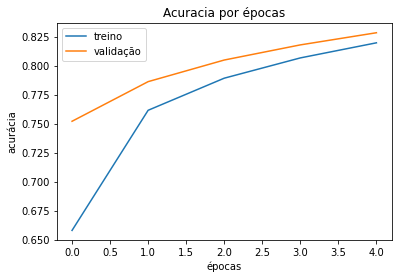

In [14]:
plt.plot(historico.history['accuracy']) # Acuracia de treino
plt.plot(historico.history['val_accuracy']) # Acuracia de validação
plt.title('Acuracia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

VISUALIZANDO AS PERDAS DE TREINO E VALIIDAÇÃO POR TEMPO

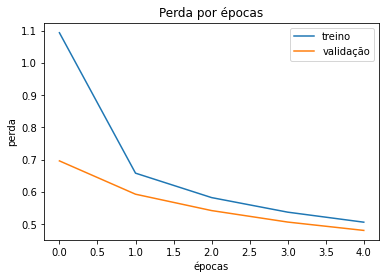

In [15]:
''' 
OBS: Repare na curva de validação na qual o erro aumenta cada vez mais e na curva de treino que ele apenas reduz. 
Isso indica que nosso modelo está perdendo pouquíssima informação no treino e muita na validação. 
O que mostra que ele está servindo bem demais o modelo, overfitting.
'''
plt.plot(historico.history['loss']) # Acuracia de treino
plt.plot(historico.history['val_loss']) # Acuracia de validação
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

TESTANDO O MODELO E O MODELO SALVO

In [16]:
testes = modelo.predict(imagens_teste)
# Para saber qual foi o resultado desse teste é nescessário pegar o maior número e sua posição vai indicar se acertou ou errou
print('Resultado teste:',  np.argmax(testes[1]))
print('Número da imagem de teste:',  identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste:',  identificacoes_teste[1])

Resultado teste: 2
Número da imagem de teste: 2
resultado teste modelo salvo: 2
Número da imagem de teste: 2


AVALIANDO O MODELO

In [17]:
# Fazendo uma função de avaliação 
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste) # Essa função avalia como o nosso modelo está indo com os dados de teste, fornecendo os dados de acurácia e perda.
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 19273.8008 - accuracy: 0.6911
Perda do teste: 19273.80078125
Acuracia do teste: 0.691100001335144
